In [1]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Exploración de datos

In [2]:
data = pd.read_csv('./data/breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data = data.drop(['id','Unnamed: 32'], axis=1)
data.head(2)
data.tail(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [5]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [8]:
data.groupby(['diagnosis']).size()

diagnosis
B    357
M    212
dtype: int64

### Plots

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.__version__

'0.11.1'

### Plots útiles en Pandas

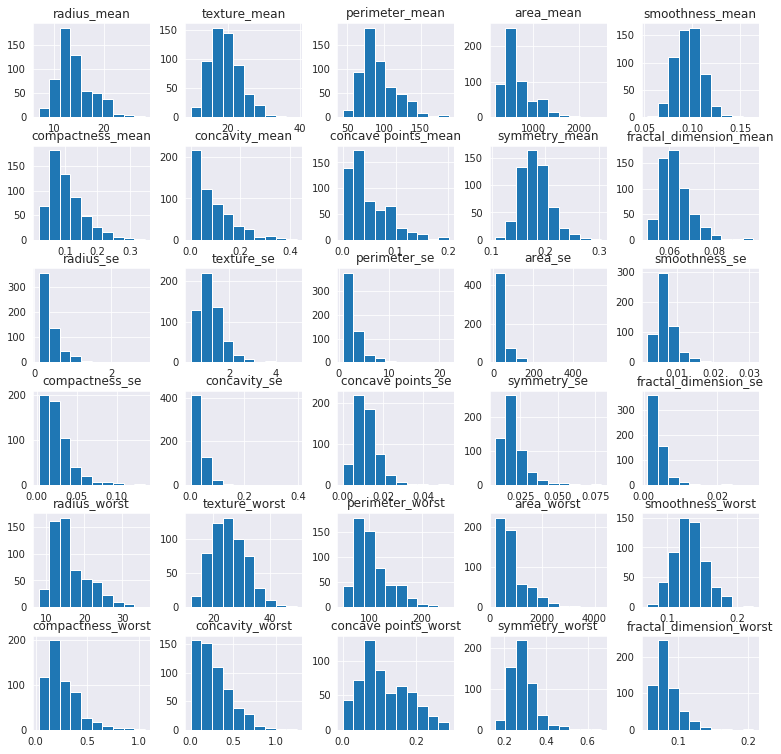

In [10]:
""" Histogramas """

data.hist(figsize=(13,13))
plt.show()

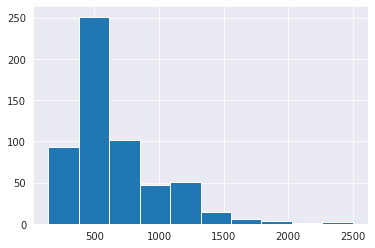

In [11]:
data.area_mean.hist()
plt.show()

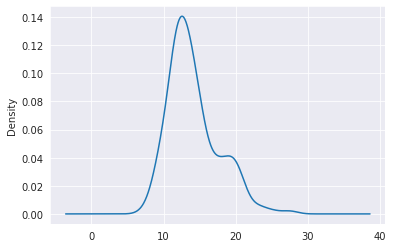

In [12]:
data.radius_mean.plot(kind='density')
plt.show()

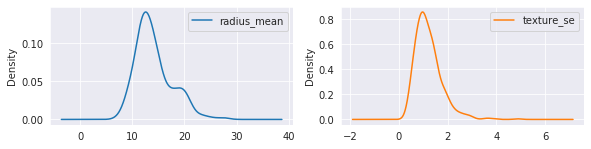

In [13]:
data[['radius_mean','texture_se']].plot(kind='density', layout=(4,4), subplots=True, sharex=False, figsize=(20,10))
plt.show()

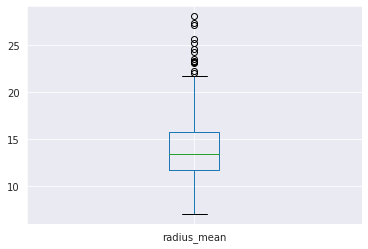

In [14]:
data.boxplot('radius_mean')
plt.show()

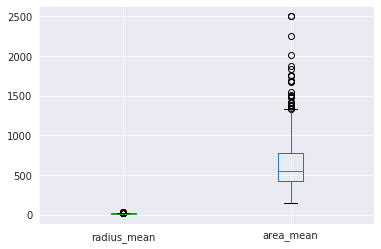

In [15]:
data.boxplot(['radius_mean','area_mean'])
plt.show()

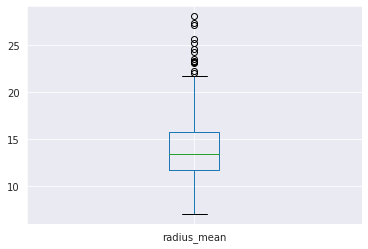

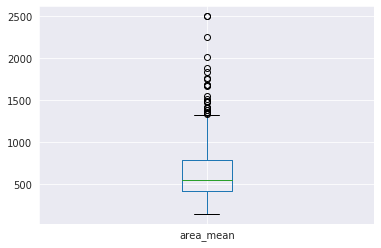

In [16]:
# Ejercicio, haced un bucle para mostrar 3 boxplots: radius_mean, area_mean, texture_mean

features = ['radius_mean','area_mean']
for feature in features:
    data.boxplot(feature)
    plt.show()

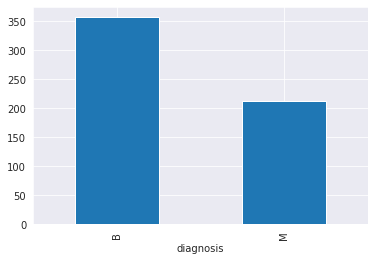

In [17]:
k = data.groupby(['diagnosis']).size()

k.plot(kind='bar')
plt.show()

In [18]:
data.corr().style.background_gradient(cmap='coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Plots útiles en matplotlib

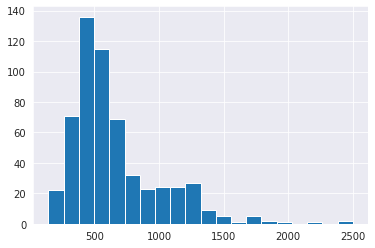

In [19]:
plt.hist(data['area_mean'], bins=20)
plt.show()

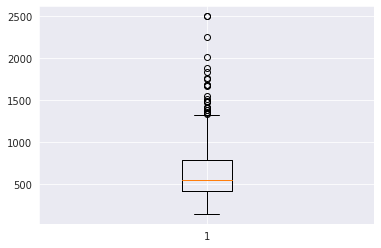

In [20]:
plt.boxplot(data['area_mean'])
plt.show()

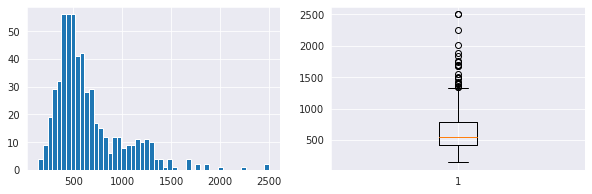

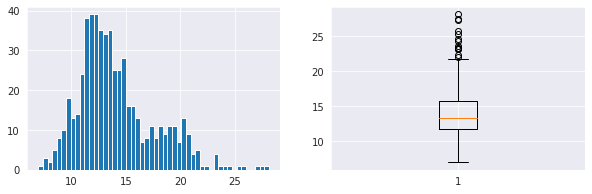

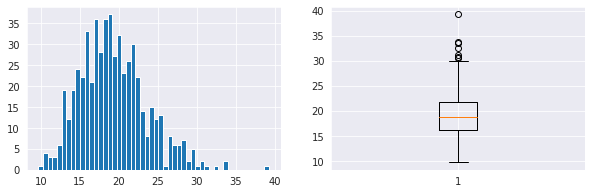

In [21]:
# Ejercicio, haced un bucle para mostrar 3 histogramas con 50 bins y 3 boxplots: radius_mean, area_mean, texture_mean

features = ['area_mean', 'radius_mean', 'texture_mean']

for feature in features:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.hist(data[feature], bins=50)
    plt.subplot(1,2,2)
    plt.boxplot(data[feature])
    plt.show()

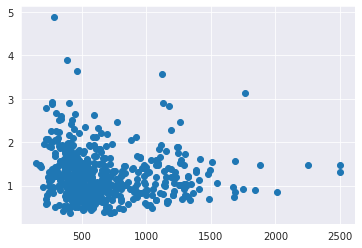

In [22]:
plt.scatter(data.area_mean, data.texture_se)
plt.show()

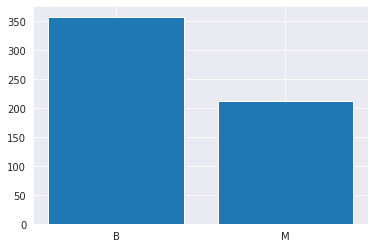

In [24]:
k = data.groupby(['diagnosis']).size()

plt.bar(k.index, k)
plt.show()

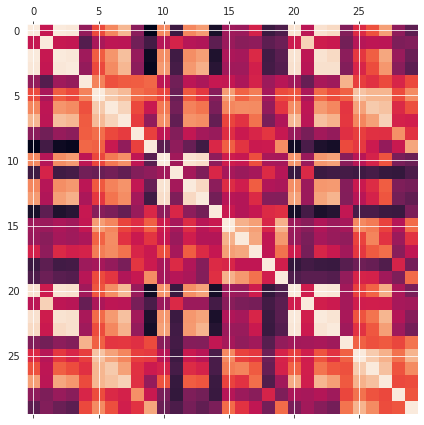

In [25]:
plt.figure(figsize=(7,7))
plt.matshow(data.corr(), fignum=1)
plt.show()

### Plots útiles en Seaborn

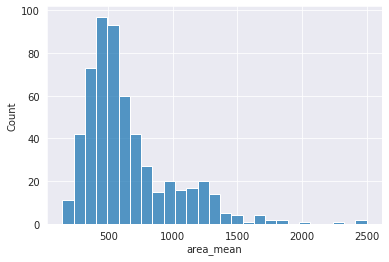

In [26]:
sns.histplot(x='area_mean', data=data, kde=False)
plt.show()

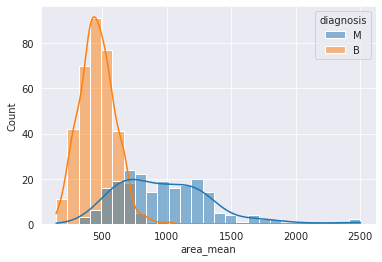

In [27]:
sns.histplot(x='area_mean', hue='diagnosis', data=data, kde=True)
plt.show()

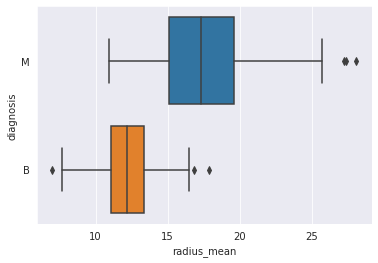

In [28]:
sns.boxplot(data=data, x='radius_mean', y='diagnosis')
plt.show()

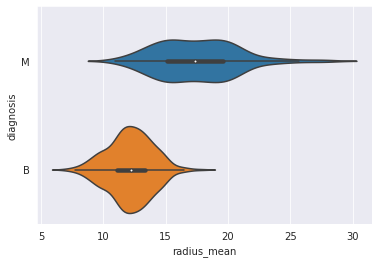

In [29]:
sns.violinplot(data=data, x='radius_mean', y='diagnosis')
plt.show()

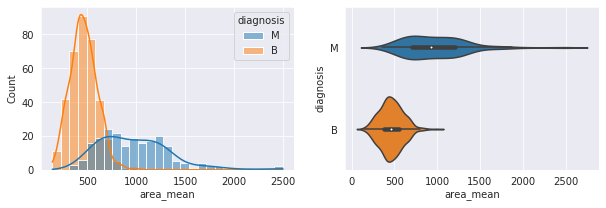

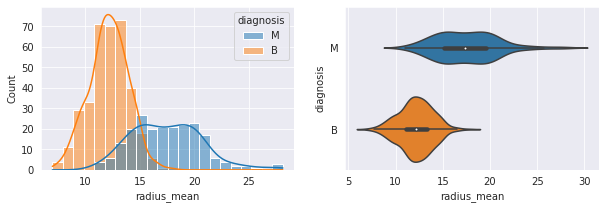

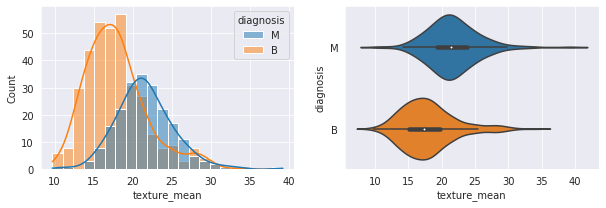

In [30]:
features = ['area_mean', 'radius_mean', 'texture_mean']

for feature in features:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(x=feature, hue='diagnosis', data=data, kde=True)
    plt.subplot(1,2,2)
    sns.violinplot(data=data, x=feature, y='diagnosis')
    plt.show()

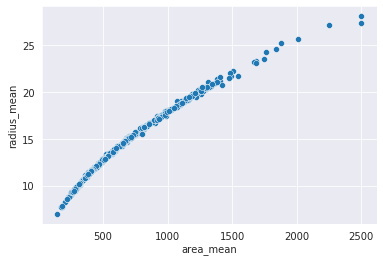

In [31]:
sns.scatterplot(x='area_mean', y='radius_mean', data=data)
plt.show()

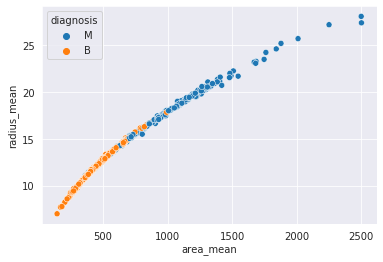

In [32]:
sns.scatterplot(x='area_mean', y='radius_mean', data=data, hue='diagnosis')
plt.show()

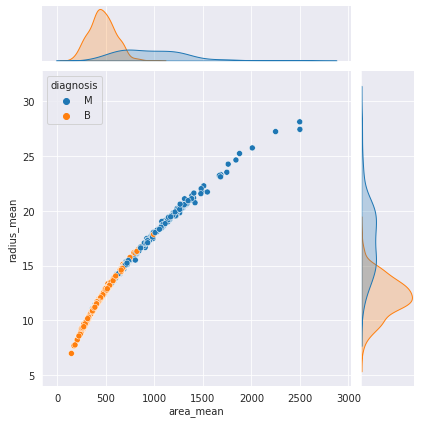

In [33]:
sns.jointplot(x='area_mean', y='radius_mean', hue='diagnosis', data=data, kind='scatter')
plt.show()

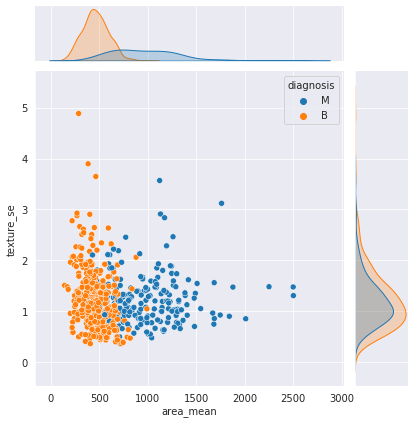

In [34]:
sns.jointplot(x='area_mean', y='texture_se', hue='diagnosis', data=data, kind='scatter')
plt.show()

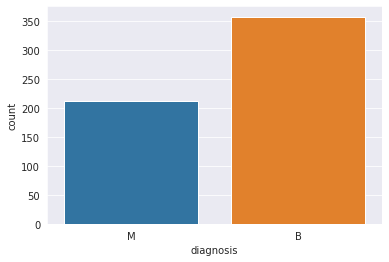

In [35]:
sns.countplot(x='diagnosis', data=data)
plt.show()

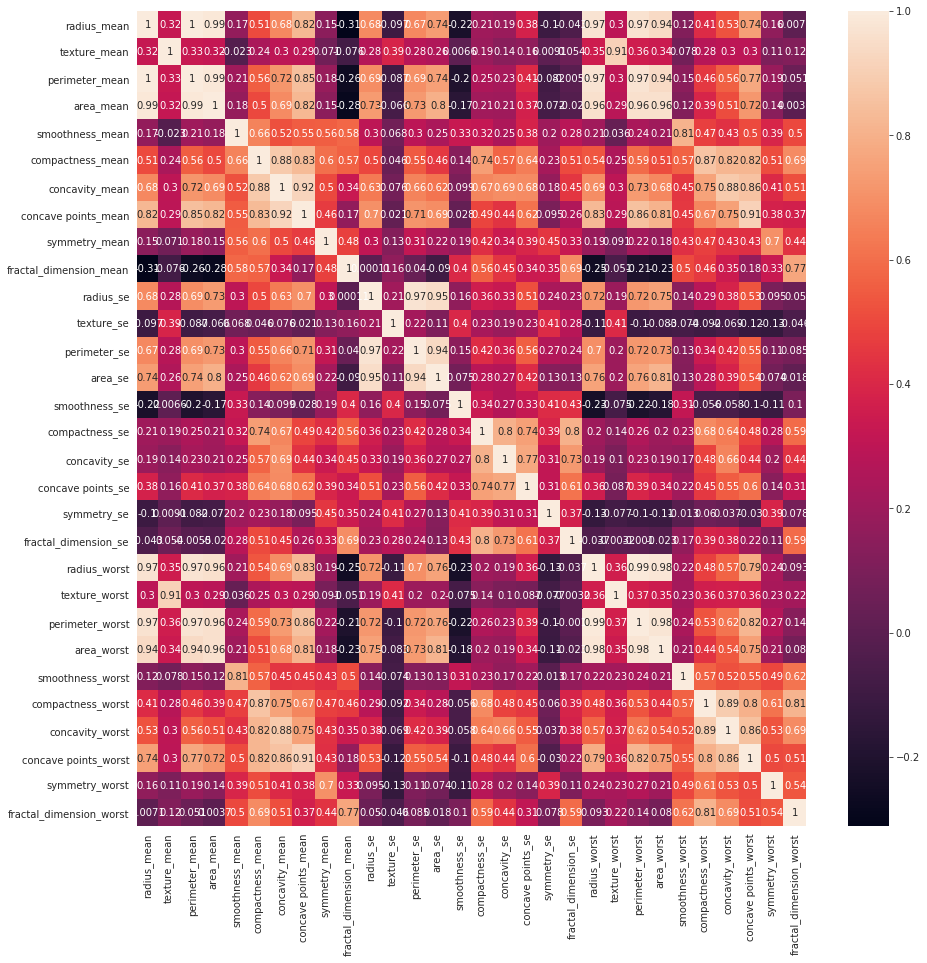

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Transformaciones de normalización y escalado

In [37]:
features = data.drop('diagnosis', axis=1)
target = data.diagnosis

In [38]:
# Uno de los problemas más desesperantes en sklearn es que, generalmente, exige variables 2-dimensionales.

X = features['area_mean']
print(X.shape)
X = features[['area_mean']]
print(X.shape)
X = features[['area_mean', 'texture_mean']]
print(X.shape)
X = features
print(X.shape)

(569,)
(569, 1)
(569, 2)
(569, 30)


In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer

In [40]:
""" 1 variable solo """

X = features[['area_mean']]
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [44]:
# Ejercicio, hacer un binarizer, cuyo threshold es la mediana

from sklearn.preprocessing import Binarizer

X = features[['area_mean']]
umbral = np.median(X)
scaler = Binarizer(threshold=umbral)
Xscaled = scaler.fit_transform(X)
Xscaled

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [197]:
# from sklearn.preprocessing import normalize

# X = features[['area_mean']]
# print(X.shape)
# Xsca = normalize(X, axis=0)
# scaler = Normalizer(norm = "l2")
# X = X / np.linalg.norm(X)

In [198]:
""" 2 o más variables """

X = features[['area_mean', 'texture_mean']]
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)

In [199]:
""" 2 o más variables """

X = features.values
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)

In [200]:
""" Deshacer la transformación """

X = features[['area_mean']]
scaler = StandardScaler()

print(X[0:5])
Xscaled = scaler.fit_transform(X)
print(Xscaled[0:5])
Xraw = scaler.inverse_transform(Xscaled)
print(Xraw[0:5])

   area_mean
0     1001.0
1     1326.0
2     1203.0
3      386.1
4     1297.0
[[ 0.9843749 ]
 [ 1.90870825]
 [ 1.55888363]
 [-0.76446379]
 [ 1.82622928]]
[[1001. ]
 [1326. ]
 [1203. ]
 [ 386.1]
 [1297. ]]


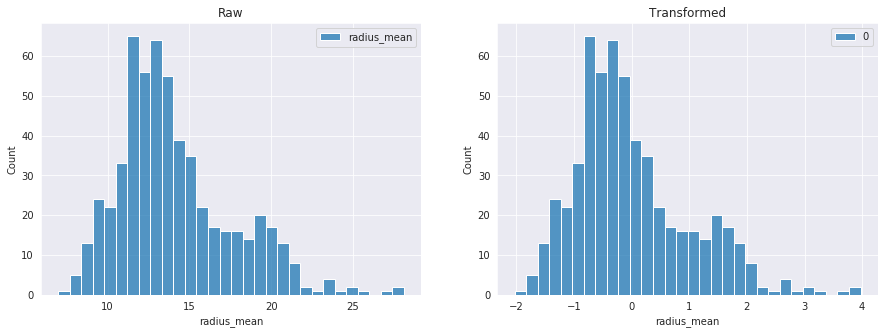

In [201]:
# Ejercicio: Hacer un histograma comparando StandardScaler y Raw data entre todas las features

scaler = StandardScaler()

for feature in features:
    
    X = features[[feature]]
    Xesc = scaler.fit_transform(X)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30)
    plt.title('Raw')
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    sns.histplot(Xesc, bins=30)
    plt.title('Transformed')
    plt.xlabel(feature)
    
    break

In [202]:
# Ejercicio: Binarizer por la mediana y aplicar una regresión logística
# compararla con un modelo que no tenga esta transformacion
# Nota: sin train-test split

from sklearn.linear_model import LogisticRegression

X, y = features, target

medians = np.median(X, axis=0)
scaler = Binarizer(threshold=medians)
Xscaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
print(score)

model = LogisticRegression()
model.fit(Xscaled, y)
score = model.score(Xscaled, y)
print(score)

# np.set_printoptions(precision=3, suppress=True)
# list(zip(model.coef_[0], X.columns))

0.945518453427065
0.9525483304042179


### Input data selection

In [203]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Compute chi-squared stats between each non-negative feature and class.
# This score can be used to select the n_features features with the highest values for 
# the test chi-squared statistic from X, 
# which must contain only non-negative features such as booleans or frequencies

X, y = features, target

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# list(zip(fit.scores_, X.columns))
# list(zip(fit.pvalues_, X.columns))
results = pd.DataFrame(zip(X.columns, fit.pvalues_, fit.scores_), columns=['feature', 'p_val', 'score'])
results.sort_values('score', ascending=False).tail()

,feature,p_val,score
11,texture_se,0.921168,0.009794
19,fractal_dimension_se,0.936380,0.006371
14,smoothness_se,0.954425,0.003266
18,symmetry_se,0.992847,0.000080
9,fractal_dimension_mean,0.993122,0.000074


In [204]:
def plotting_hist_boxplot(feature):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(x=feature, hue='diagnosis', data=data, kde=True)
    plt.subplot(1,2,2)
    sns.violinplot(data=data, x=feature, y='diagnosis')
    plt.show()

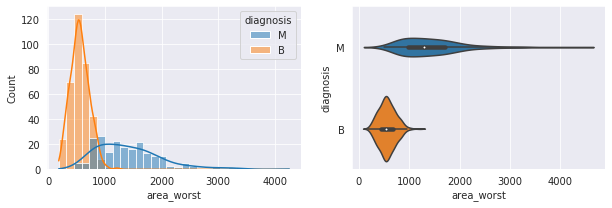

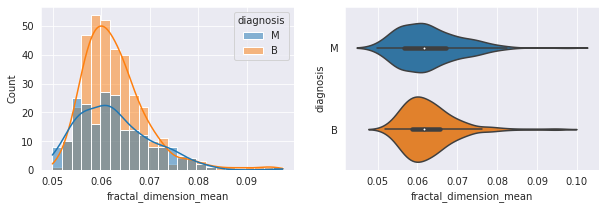

In [205]:
plotting_hist_boxplot('area_worst')
plotting_hist_boxplot('fractal_dimension_mean')

In [206]:
print(X.shape)
X_new = SelectKBest(score_func=chi2, k=4).fit_transform(X,y)
print(X_new.shape)

(569, 30)
(569, 4)


4  features =>  91.22807017543859  accuracy
5  features =>  92.10526315789474  accuracy
6  features =>  92.10526315789474  accuracy
7  features =>  92.10526315789474  accuracy
8  features =>  92.10526315789474  accuracy
9  features =>  92.10526315789474  accuracy
10  features =>  92.10526315789474  accuracy
11  features =>  92.98245614035088  accuracy
12  features =>  92.98245614035088  accuracy
13  features =>  92.98245614035088  accuracy
14  features =>  92.10526315789474  accuracy
15  features =>  92.10526315789474  accuracy
16  features =>  92.98245614035088  accuracy
17  features =>  92.98245614035088  accuracy
18  features =>  94.73684210526315  accuracy
19  features =>  95.6140350877193  accuracy
20  features =>  96.49122807017544  accuracy
21  features =>  95.6140350877193  accuracy
22  features =>  95.6140350877193  accuracy
23  features =>  95.6140350877193  accuracy
24  features =>  95.6140350877193  accuracy
25  features =>  95.6140350877193  accuracy
26  features =>  94.73

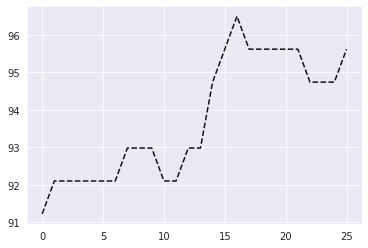

In [207]:
# Ejercicio, hacer un Pipeline para ajustar un Linear Discriminant Analysis con un 
# MinMaxScaler (para que no haya negativos) y un Feature extraction y probarlo para k=4:30
# Nota: sin train-test split

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X, y = features, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

algorithm = LogisticRegression(random_state=99)
scaler = MinMaxScaler()

accuracies = []
for k in range(4, 30):
    selector = SelectKBest(score_func=chi2, k=k)
    model = make_pipeline(scaler, selector, algorithm)
    model.fit(X_train, y_train)
    result = model.score(X_test, y_test)
    accuracies.append(result*100)
    print(str(k), ' features => ', str(result*100.0), ' accuracy')
    
plt.plot(accuracies, '--', color="#111111", label="Training score")
plt.show()

[0.05322781 0.02198279 0.06307249 0.06649097 0.01290711 0.02036364
 0.06303072 0.08686085 0.0067897  0.00735546 0.02164024 0.00513205
 0.02037849 0.02493071 0.00538298 0.00797528 0.01070128 0.00639559
 0.00585922 0.00689945 0.08708337 0.03053754 0.08781232 0.06118347
 0.02382643 0.02045995 0.05029987 0.09869393 0.01214903 0.01057724]


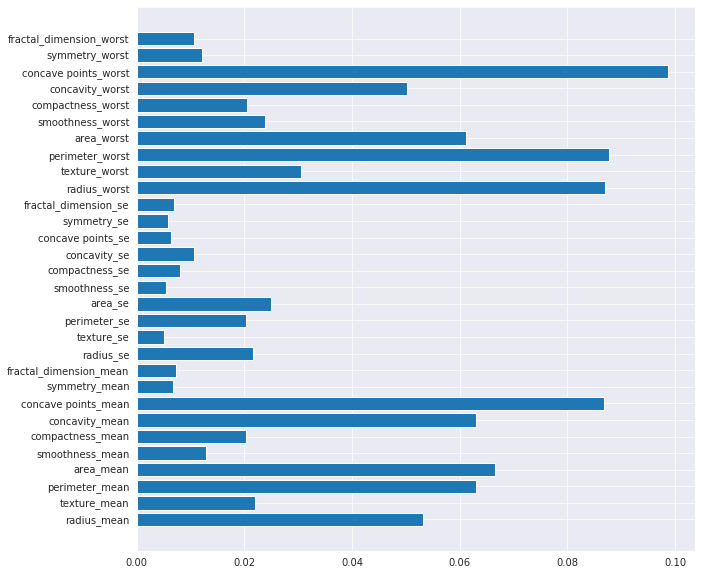

In [208]:
""" Feature importances """

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.feature_importances_)
plt.show()

[[-0.9389437  -0.44731261 -0.28168386  0.01626345  0.0348666   0.16434582
   0.23012969  0.09692528  0.04830628  0.00962831 -0.0407146  -0.37066253
  -0.14269014  0.10766209  0.00315749  0.03532541  0.0492035   0.012623
   0.01166453  0.00327869 -0.99792364  0.49888793  0.24797049  0.01378284
   0.06327531  0.51256309  0.63791483  0.18651416  0.15321518  0.04923659]]


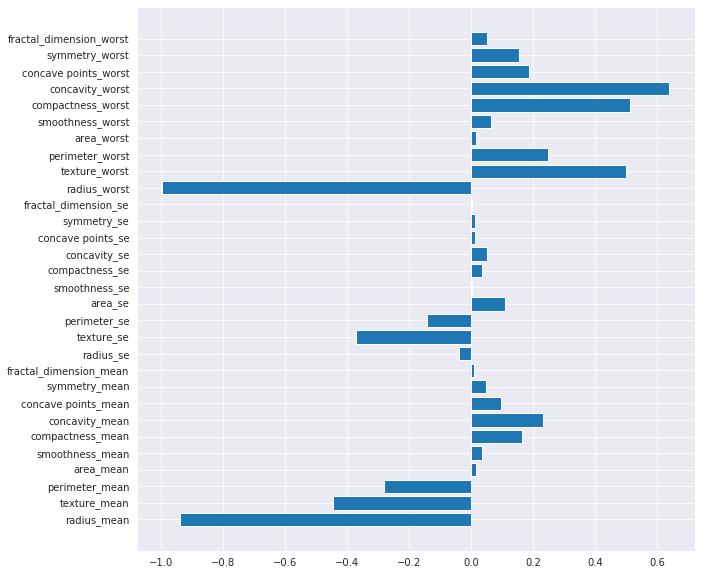

In [209]:
from sklearn.linear_model import LogisticRegression

""" NO NORMALIZADO!! """

model = LogisticRegression()
model.fit(X, y)
print(model.coef_)

plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.coef_[0])
plt.show()

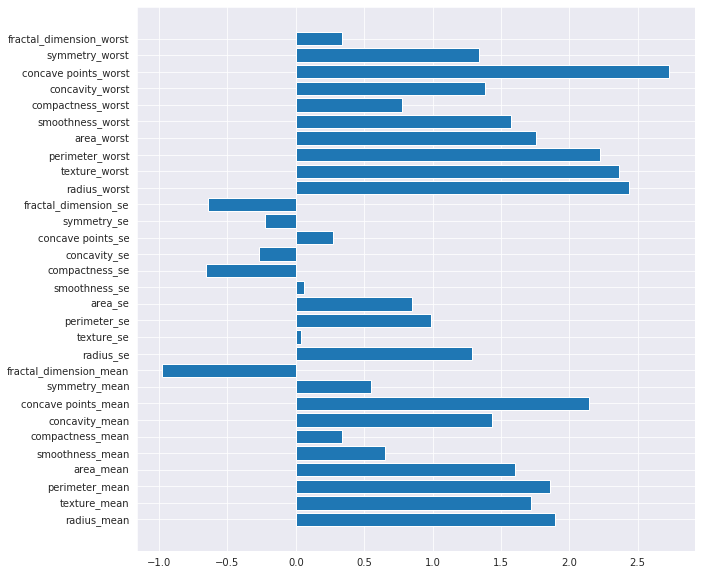

In [210]:
""" NORMALIZADO """

algorithm = LogisticRegression(random_state=99)
scaler = MinMaxScaler()
model = make_pipeline(scaler, algorithm)
model.fit(X, y)

plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=algorithm.coef_[0])
plt.show()

In [211]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select = 1)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: ", str(fit.support_))
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 1
Selected Features:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False]
Feature Ranking: [ 5 15 25 28 23  9  8 10 12 27 13  3 11 18 30 17 19 24 26 29  4 14 20 22
 21  2  1  6  7 16]


In [212]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)

print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.98204467 0.01617649 0.00155751]
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3

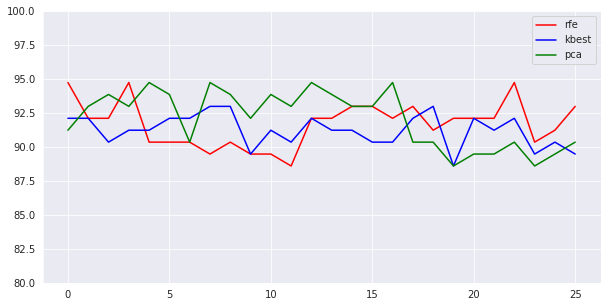

In [213]:
# Ejercicio, haced un pipeline que compare, con un Decision tree, minmaxscaler y rfe/kbest/pca para k=4:30

from sklearn.tree import DecisionTreeClassifier

X, y = features, target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=99)

algorithm = DecisionTreeClassifier(random_state=99)
scaler = MinMaxScaler()

accuracies_rfe = []
accuracies_kbest = []
accuracies_pca = []

for k in range(4, 30):
    selector1 = SelectKBest(score_func=chi2, k=k)
    model1 = make_pipeline(scaler, selector1, algorithm)
    model1.fit(X_train, Y_train)
    result = model1.score(X_test, Y_test)
    accuracies_rfe.append(result*100)
    
    selector2 = RFE(algorithm, n_features_to_select=k)
    model2 = make_pipeline(scaler, selector2, algorithm)
    model2.fit(X_train, Y_train)
    result = model2.score(X_test, Y_test)
    accuracies_kbest.append(result*100)
    
    selector3 = PCA(n_components=k)
    model3 = make_pipeline(scaler, selector3, algorithm)
    model3.fit(X_train, Y_train)
    result = model3.score(X_test, Y_test)
    accuracies_pca.append(result*100)
    
plt.figure(figsize=(10,5))
plt.plot(accuracies_rfe, '-', color="red", label="rfe")
plt.plot(accuracies_kbest, '-', color="blue", label="kbest")
plt.plot(accuracies_pca, '-', color="green", label="pca")
plt.ylim((80,100))
plt.legend()
plt.show()

### Model evaluation

In [214]:
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict

In [215]:
""" Train / Test split """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model = LogisticRegression()

model.fit(X_train, y_train)
result = model.score(X_test, y_test)

print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 93.860%


In [216]:
""" KFold """

kfold = KFold(n_splits=10, shuffle=True, random_state=7)

results = cross_val_score(model, X, y, cv=kfold)

print(results)

# print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.92982456 0.96491228 0.96491228 1.         0.94736842 0.87719298
 0.94736842 0.98245614 0.92982456 0.94642857]


In [217]:
# Ejercicio, revisar si hay mejoría en los resultados si hacemos k=3, 5, 10 folders

folders = [3, 5, 10]
for folder in folders:
    kfold = KFold(n_splits=folder, shuffle=True, random_state=7)
    results = cross_val_score(model, X, y, cv=kfold)
    print("Accuracy for k=%d: %.3f%% (%.3f%%)" % (folder, results.mean()*100.0, results.std()*100.0))

Accuracy for k=3: 93.851% (1.620%)
Accuracy for k=5: 94.198% (2.054%)
Accuracy for k=10: 94.903% (3.183%)


Accuracy: 94.552 (22.697)


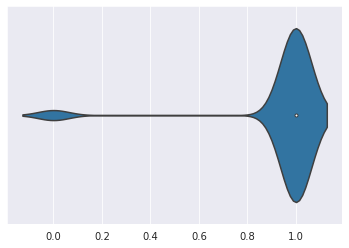

In [218]:
""" Leave One Out """

loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=loocv)

print("Accuracy: %.3f (%.3f)" % (results.mean()*100.0, results.std()*100.0))

sns.violinplot(results)
plt.show()

In [219]:
import time
t1 = time.time()

model = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)

t2 = time.time()

model = LogisticRegression()
loocv = LeaveOneOut()
results = cross_val_score(model, X, y, cv=loocv)

t3 = time.time()

print('10-Fold time: %.3f secs' % (t2-t1))
print('LOO time: %.3f secs' % (t3-t2))

10-Fold time: 2.085 secs
LOO time: 60.402 secs


In [220]:
""" SuffleSplit """

kfold = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

model= LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.860% (1.241%)


0.9771616541353383


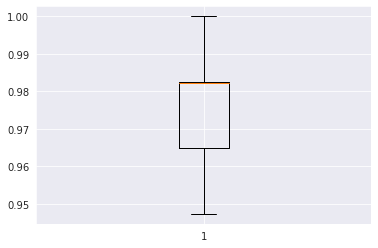

In [221]:
# Ejercicio, construir un pipeline que reescale los datos a Standared, 
# y aplique una regresion logística. Introducirlo en un cv-score de 10 folders para ver los resultados de entrenamiento.
# y dibujar un boxplot con los resultados

scaler = StandardScaler()
algorithm = LogisticRegression()

pipeline = make_pipeline(scaler, algorithm)

kf = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(pipeline,           # Pipeline
                             features,           # Feature matrix
                             target,             # Target vector
                             cv=kf)              # Cross-validation technique

print(cv_results.mean())
plt.boxplot(cv_results)
plt.show()

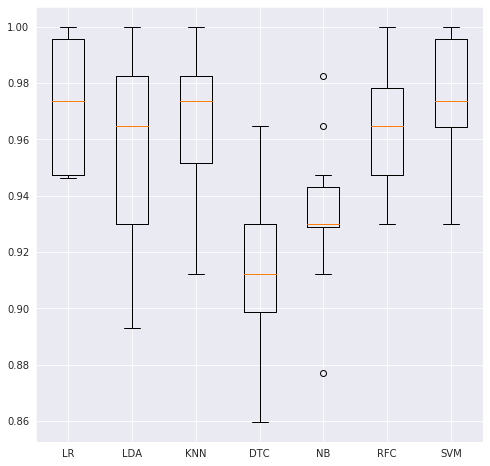

In [222]:
# Ejercicio, mismo problema de antes, pero comparando 7 modelos de clasificación

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    scaler = StandardScaler()
    pipeline = make_pipeline(scaler, model)

    kf = KFold(n_splits=10, shuffle=True, random_state=157)
    cv_results = cross_val_score(pipeline,           # Pipeline
                                 features,           # Feature matrix
                                 target,             # Target vector
                                 cv=kf)              # Cross-validation technique
    names.append(name)
    results.append(cv_results)

plt.figure(figsize=(8,8))
plt.boxplot(results)
plt.xticks(range(1,len(names)+1), names)
plt.show()

In [223]:
""" cross val predict """

pipeline = make_pipeline(scaler, model)

kf = KFold(n_splits=10, shuffle=True, random_state=157)
cv_results = cross_val_predict(pipeline,           # Pipeline
                               features,           # Feature matrix
                               target,             # Target vector
                               cv=kf)              # Cross-validation technique

cv_results

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

### Métricas

In [224]:
""" Métrica en cross validation """

model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

scoring = 'neg_log_loss'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.939 (0.012)
Logloss: -0.162 (0.040)
AUC: 0.985 (0.010)


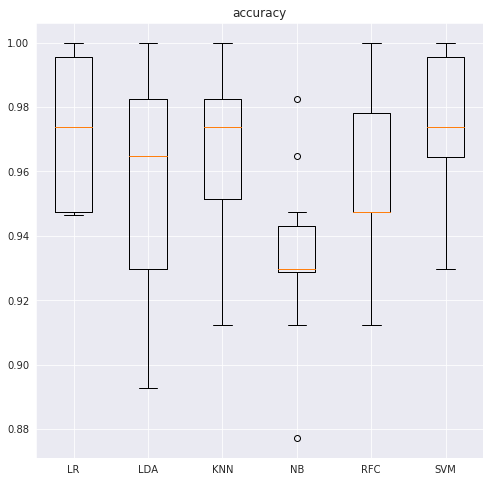

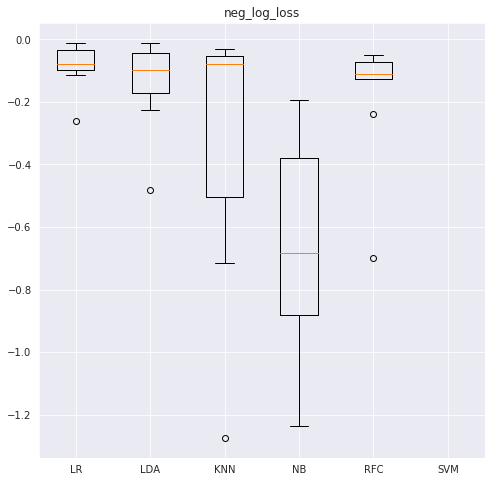

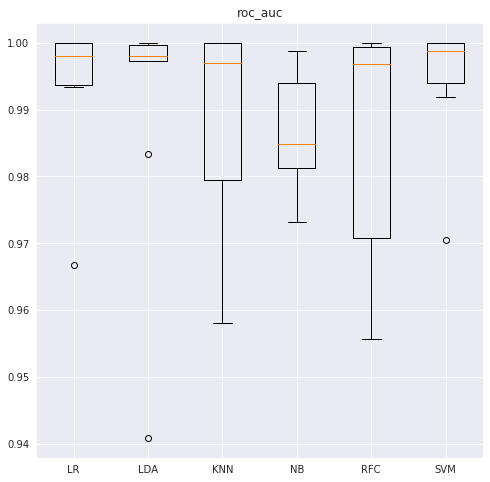

In [225]:
# Ejercicio, entrenar el pipeline anterior con distintas métricas

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

scorings = ['accuracy', 'neg_log_loss', 'roc_auc']
for scoring in scorings:
    results = []
    names = []
    for name, model in models:
        scaler = StandardScaler()
        pipeline = make_pipeline(scaler, model)

        kf = KFold(n_splits=10, shuffle=True, random_state=157)
        cv_results = cross_val_score(pipeline,           # Pipeline
                                     features,           # Feature matrix
                                     target,             # Target vector
                                     cv=kf,              # Cross-validation technique
                                     scoring=scoring)    # Loss function
        names.append(name)
        results.append(cv_results)

    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.title(scoring)
    plt.show()


0.9122807017543859
0.9285714285714286
              precision    recall  f1-score   support

           B       0.92      0.94      0.93        69
           M       0.91      0.87      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

[[65  4]
 [ 6 39]]
65 4 6 39


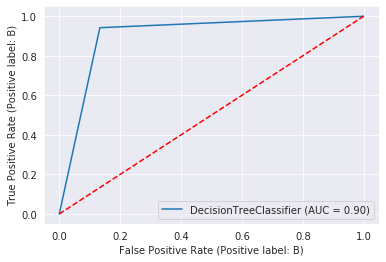

In [232]:
""" Métrica en train / test """

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric = accuracy_score(y_test, y_pred)
print(metric)
metric = f1_score(y_test, y_pred, pos_label="B")
print(metric)
metric = classification_report(y_test, y_pred)
print(metric)
metric = confusion_matrix(y_test, y_pred)
print(metric)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test, pos_label="B")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlim(0,0.2)
# plt.ylim(0.8,1.0)
plt.show()

### Algoritmos de clasificacion

In [240]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [233]:
def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [238]:
def model_evaluation(models, X, y):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=7)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    return results, names

LR: 0.949029 (0.031828)
LDA: 0.954355 (0.016025)
KNN: 0.931516 (0.028702)
NB: 0.938440 (0.025287)
RFC: 0.961341 (0.015281)
SVM: 0.919204 (0.035189)


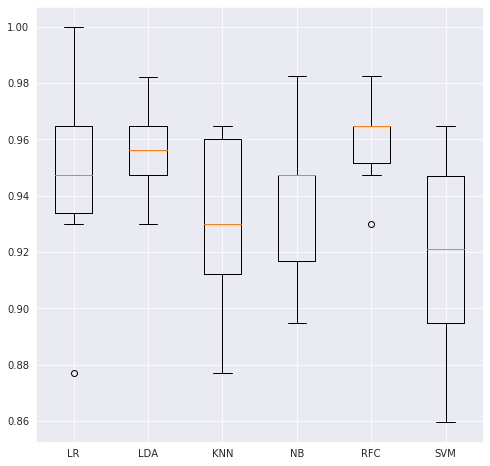

In [239]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

results, names = model_evaluation(models, X, y)    
boxplots_algorithms(results, names)

# Model tuning

In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 6, 12, 24], 
              'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()

rsearch = GridSearchCV(estimator=model, param_grid=param_grid)
rsearch.fit(X, y)

print(rsearch.best_score_)
print(rsearch.best_estimator_.max_depth)
print(rsearch.best_estimator_.criterion)

0.9314547430523211
6
entropy


In [ ]:
# Ejercicio, realizar una búsqueda de la mejor parametrización de todos los modelos vistos en models
# Comprobar los resultados con F1-score
# Utilizad el random-state de 99


